In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
import warnings
from nltk.tokenize import word_tokenize
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
import time
import nltk
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def heatconmat(y_true,y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r',
                yticklabels=sorted(y_test.unique()))
    plt.show()
    print(classification_report(y_true,y_pred))

In [0]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [0]:
def fashion_scatter(x, colors):
    
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
  
    fig,ax = plt.subplots(figsize=(7,7))
    groups = pd.DataFrame(x, columns=['x', 'y']).assign(Decision=y_train).groupby('Decision')
    for name, points in groups:
      ax.scatter(points.x, points.y, label=name)
      ax.legend()
    plt.xlim(-40, 40)
    plt.ylim(-40, 40)
    ax.axis('off')
    ax.axis('tight')
    txts = []
    return fig, ax, txts

In [0]:
# Main steps for processing the data.

In [0]:
train = pd.read_csv('a1_train.tsv', sep='\t',header=None)
train.columns = ['TEXT','Decision']

In [0]:
test = pd.read_csv('a1_dev.tsv', sep='\t',header=None)
test.columns = ['TEXT','Decision']

In [8]:
train.head()

,TEXT,Decision
0,A situation in which I was able to positively ...,1
1,"Remember, coming across it incident. Consumer....",0
2,"Alright and my previous job, I worked at a deb...",0
3,Usually bribery in implementing this using oth...,1
4,"At my current position, I implemented a safety...",1


In [9]:
test.head()

,TEXT,Decision
0,As a high school teacher for 30 years in a sma...,1
1,A situation in which I was able to positively ...,0
2,Hi I'm so a situation in which I was able to p...,1
3,But I'm I have to impact the positive iti of o...,0
4,A situation where I was able to positively inf...,1


In [10]:
train.shape

(2440, 2)

In [11]:
test.shape

(503, 2)

In [0]:
tagged_tr = [TaggedDocument(words=word_tokenize(_d.lower()),\
tags=[str(i)]) for i, _d in enumerate(train.TEXT)]

tagged_test = [TaggedDocument(words=word_tokenize(_d.lower()),\
tags=[str(i)]) for i, _d in enumerate(test.TEXT)]

In [0]:
model = Doc2Vec(vector_size=1000, window=2, alpha=1.5, min_count=2, workers=4)
                
model.build_vocab(tagged_tr)

In [14]:
max_epochs = 40
t1 = time.time()
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch+1))
    model.train(tagged_tr,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    model.alpha -= 0.0002
    model.min_alpha = model.alpha
   
print("done!")
t2 = time.time()    
model.save("Model")
print("Time: {}".format(t2-t1))

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
done!


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Time: 175.4438774585724


In [0]:
X_train = np.array([model.docvecs[str(i)] for i in range(len(tagged_tr))])
y_train = train.Decision
X_test = np.array([model.infer_vector(tagged_test[i][0]) for i in range(len(tagged_test))])
y_test = test.Decision

In [0]:
time_start = time.time()
fashion_tsne = TSNE(random_state=100).fit_transform(X_train)

(<Figure size 504x504 with 1 Axes>,
 [])

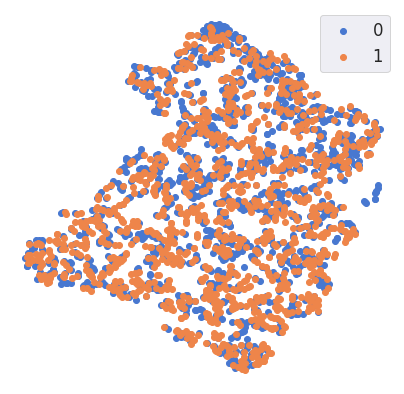

In [17]:
fashion_scatter(fashion_tsne, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


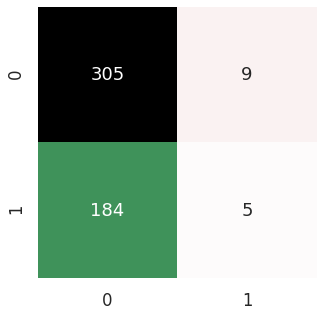

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       314
           1       0.36      0.03      0.05       189

    accuracy                           0.62       503
   macro avg       0.49      0.50      0.40       503
weighted avg       0.52      0.62      0.49       503



In [18]:
lrc = LogisticRegression(C=5, multi_class='multinomial', solver='saga',max_iter=1000)
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)
heatconmat(y_test,y_pred)